<center> <strong><font size="+2">Handbook</font>  </strong> </center>

\begin{split}
    {\Large\textit{How To use}\ \texttt{Ptycho.py}}\nonumber \\
    {\small by: \textit{DELENDA ANOUAR AKACHA}}\nonumber 

\end{split}

# I. Brief math of the Time Domain Ptychography:
The goal is to find the complex electric field profile for the Gate "$G(t)$" and the Test "$E(t)$" pulse that reconstruct the recorded ptychogram $I(\omega, \tau)$ given by :
\begin{split}
    I(\omega, \tau) = \left| \int_{-\infty}^{+\infty}G(t-\tau)E(t)e^{j\omega t}dt \right|^2
\end{split}

So far, the same concept of the global projection is implemented here (updating a guess until we converge to a solution)

<center> <img src="GP.PNG"/> <br>
<span>Fig.1: Generalized Projection, from 
<a href="https://doi.org/10.1364/OL.19.002152">DeLong et al. Optics letters (1994).</a></span> </center>

The constraint 1 is given by equation (1), and the second one is the fact that for anny delay $\tau_m$ we have the folowing:

\begin{split}
    I(\omega, \tau_m) = \left| \int_{-\infty}^{+\infty}G(t-\tau_m)E(t)e^{j\omega t}dt \right|^2
\end{split}

Thus the algorithm consist of looping over all the $M$ spectra and update each time the pulses "$E(t)$" $\&$ "$G(t)$" according to:

\begin{split}
    E_{k+1}(t) = E_{k}(t) + \alpha \frac{G_{k}*(t-\tau_m)}{max{|G_{k}(t-\tau_m)|^2}} \left[ \chi'(t-\tau_m) - \chi(t-\tau_m)\right]\\
    G_{k+1}(t) = G_{k}(t) + \alpha \frac{E_{k}*(t-\tau_m)}{max{|E_{k}(t-\tau_m)|^2}} \left[ \chi'(t-\tau_m) - \chi(t-\tau_m)\right]
\end{split}

the quantity $\chi(t-\tau_m)$ is called the exit-wave and it is the product of the two guesses "$E_{k}(t)$" $\&$ "$G_{k}(t-\tau_m)$". Moreover, $\chi'(t-\tau_m)$ is obtained by replacing the the magnetiude of its Fourier Transform by the corresponding spectra ($\sqrt{I(\omega, \tau_m)}$) while we maintain the same phase. The following chart summarize the algorithm flow.

<center> <img src="TDP algo.PNG" width="400" height="500"/> <br>
<span>Fig.2: The flow chart of the Time Domain Ptychography routine, updated from 
<a href="https://doi.org/10.1016/j.ultramic.2009.05.012">Maiden et al. Ultramicroscopy (2009).</a></span> </center>

# II. In troduction to the package "$\texttt{ptycho.py}$":

The package consist of very friendly writen function in order to simplify the TDP analysis.

## II.1 Requirements:

To use this package you need to install "$\texttt{python}$" for sure and the following library: $\texttt{numpy}, \texttt{scipy}$ and $\texttt{matplotlib}$.\\
To be able to use it just copy it in any folder you want lets say "../desktop/Ptycho", then it is up to you if you want to work in the same directory or note.

### II.1.a Same directory:

Just write the following line in your notebook:

In [1]:
from ptycho import *
Ptc = ptycho()

### II.1.b Different directory:

Copy the next line into your notebook:

In [ ]:
import sys
ptycho_Path=r'C:/USER/Python/.../desktop/Ptycho' # change the path according to what you have
if ptycho_Path not in sys.path: sys.path.append(ptycho_Path)

## II.2 Starting point:

### Load the ptychogram:

In oreder to load the recorded 2D traces, we proceed with the function "$\texttt{read\_trace()}$" as following:

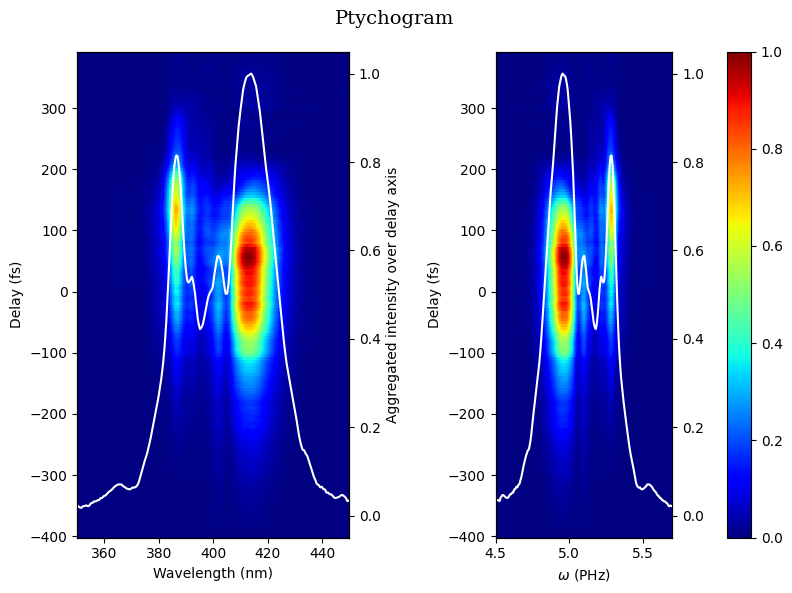

In [7]:
data, w, t, delay, guess_w, guess_t = Ptc.read_trace(path="ptycho_reflection_2.txt",\
                                                    draw=True, om_lim=(4.5, 5.7),\
                                                    wl_lim=(350, 450), N_int=1024)

### "$\texttt{read\_trace()}$" paramaters:

$\texttt{path}$: string, the path to your 2D map,
$\texttt{title:}$ string, the title of your ptychogram,
$\texttt{wl\_lim:}$ tuple, the limits of the plot along the wavelength axis (optional),
$\texttt{om\_lim:}$ tuple, the limits of the plot along the angular frequency axis (optional),
$\texttt{draw:}$ boolean, to plot the recorder trace. Default is False,
$\texttt{figsize:}$ tuple, to adjust the plot size. Default = (8, 6),
$\texttt{N\_int:}$ integer, the number of point for which your data will be interpolated.

### The function return :

In order the interpolated data, the angular frequency axis, the time and the delay axes and also the so called the marginla both tempolar and spectral profile.

### Set the initial guess:

We can set freely our initial guess for both the gate and the test pulse. However, we choose for convergence reason to set:

\begin{split}
    E(t) = \int_{-\infty}^{+\infty}\left\{ \int_{\tau_{min}}^{\tau_{max}} \sqrt{I(\omega, \tau)} d\tau\right\} e^{j \omega t} dt
\end{split}    

For the gate it can be a pertfect gaussian with an important temporal window. or the we can choose the largest spectra along the delay axis for a fixed $\omega_i$. We can try to study the effects of this two condition on our algorithm. Moreover, the experiment shows that we can get acces to the spectra og the gate pulse, so we can import it and use it directely.

#### Example:

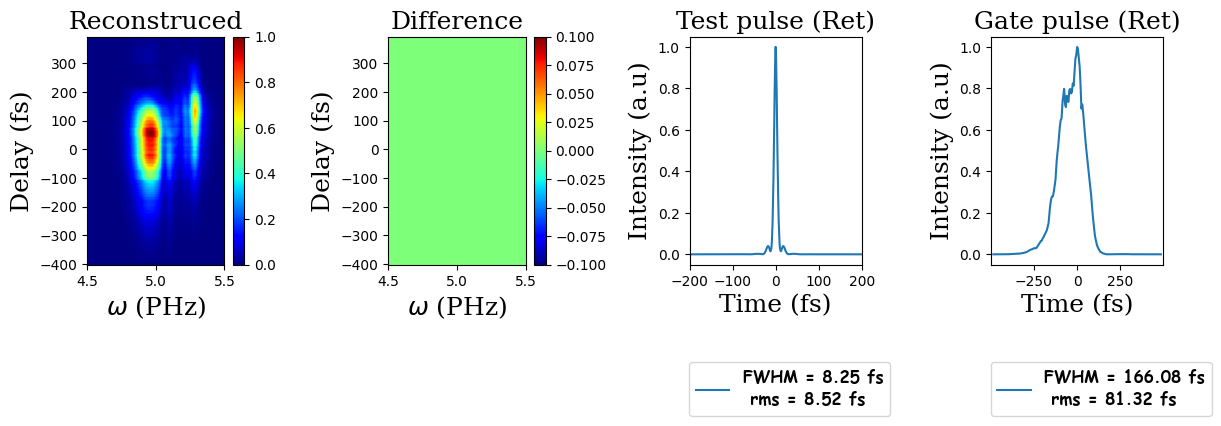

In [8]:
ind_g = np.where(data.T == np.max(data.T))[0][0]
G_t =  np.interp(t*1e15, delay-delay[np.argmax(data.T[ind_g, :])], data.T[ind_g, :])
G_t /= max(G_t)
# or we set a gaussian of hundreds of fs as FWHM
#G_t = np.sqrt(Ptc.Gaussian(t*1e15, FWHM= 360))

E_old, G_old = guess_t, G_t
Ptc.plot_panel(E_old, G_old, t*1e15, w/1e15, delay, data, data,E_t_lim = (-200, 200), figsize=(12, 6), om_lim=(4.5, 5.5))

$\bullet$ In the axample above we used the function $"\texttt{plot\_panel()}"$, and as the name indicate it useful to plot what we have and to see our start how it looks like. For the paramaters of it, it suffice to hover by the mousse on the the function itself and read the input. (The diffrenece is null because I gave the same 2D map).

### Perform a retrieval

The following cell perform a loop for 400 times and each during iteration we do a single TDP retrieval.

In [4]:
RMS = []
for i in range(400):

    E_old, G_old = Ptc.single_ptycho(gate=G_old, test=E_old, w_axis=w*1e-15, t_axis=t*1e15, delay=delay,\
                                      Imn=data, update_g=True, gate_wonder=False, pulse_wonder= False)
    
    if i%20 == 0:
        Imn_new = abs( Ptc.pty_signal(w/1e15, E_old, G_old, delay)  )**2
        Imn_new /= np.max(Imn_new)
        RMS.append(Ptc.G_trebino(data, Imn_new))
        print("Test fwhm: {:.2f} fs".format(Ptc.fwhm_eval(t*1e15, abs(E_old)**2)),\
            "Gate fwhm: {:.2f} fs".format(Ptc.fwhm_eval(t*1e15, abs(G_old)**2)),\
            "RMS: {:.3e}".format(RMS[-1]))

Test fwhm: 4.07 fs Gate fwhm: 108.02 fs RMS: 4.182e-02
Test fwhm: 6.97 fs Gate fwhm: 96.00 fs RMS: 7.319e-03
Test fwhm: 7.14 fs Gate fwhm: 96.16 fs RMS: 7.127e-03
Test fwhm: 7.05 fs Gate fwhm: 96.02 fs RMS: 6.794e-03
Test fwhm: 7.36 fs Gate fwhm: 94.67 fs RMS: 7.150e-03
Test fwhm: 7.60 fs Gate fwhm: 92.08 fs RMS: 7.059e-03
Test fwhm: 7.67 fs Gate fwhm: 94.82 fs RMS: 6.919e-03
Test fwhm: 7.76 fs Gate fwhm: 92.10 fs RMS: 6.718e-03
Test fwhm: 7.85 fs Gate fwhm: 92.30 fs RMS: 6.777e-03
Test fwhm: 7.84 fs Gate fwhm: 92.19 fs RMS: 6.861e-03
Test fwhm: 7.83 fs Gate fwhm: 96.37 fs RMS: 7.049e-03
Test fwhm: 8.00 fs Gate fwhm: 96.63 fs RMS: 6.674e-03
Test fwhm: 7.94 fs Gate fwhm: 96.57 fs RMS: 7.048e-03
Test fwhm: 7.95 fs Gate fwhm: 96.89 fs RMS: 6.758e-03
Test fwhm: 7.95 fs Gate fwhm: 96.70 fs RMS: 7.073e-03
Test fwhm: 7.98 fs Gate fwhm: 97.18 fs RMS: 6.873e-03
Test fwhm: 7.94 fs Gate fwhm: 97.12 fs RMS: 7.005e-03
Test fwhm: 7.96 fs Gate fwhm: 96.84 fs RMS: 6.876e-03
Test fwhm: 7.90 fs Gate fwh

#### Visualize the results:

By one simple line as before we use "$\texttt{plot\_panel()}$" function.

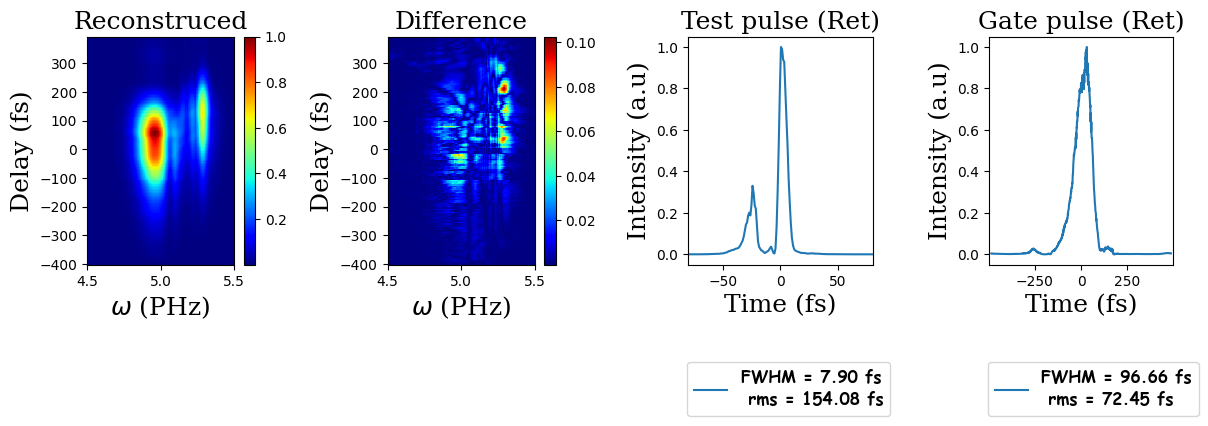

In [5]:
Ptc.plot_panel(E_old, G_old, t*1e15, w/1e15, delay, Imn_new, data, om_lim= (4.5, 5.5), E_t_lim= (-80, 80),\
 figsize=(12, 6)) 

### Center of Mass

The coefficient of the plynomial fit of order 1: [-2.15307080e-13  5.08853445e-29]


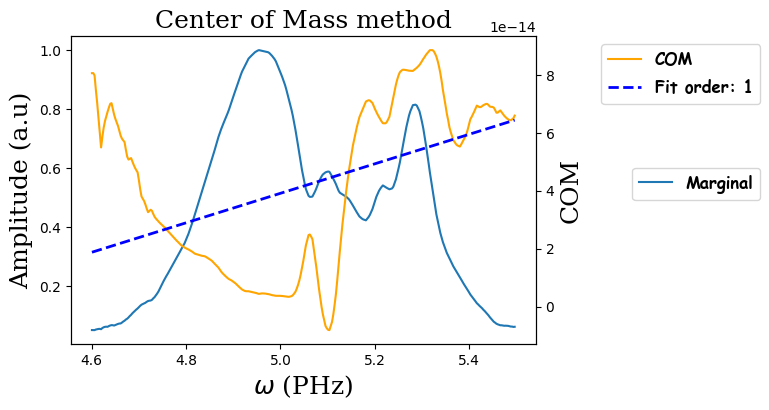

[array([-2.15307080e-13,  5.08853445e-29])]

In [3]:
Ptc.COM(data, w, delay, lim= (4.6, 5.5), draw=True)

### Center of Mass at the begining

The coefficient of the plynomial fit of order 1: [-6.65950390e-14  2.34474335e-29]


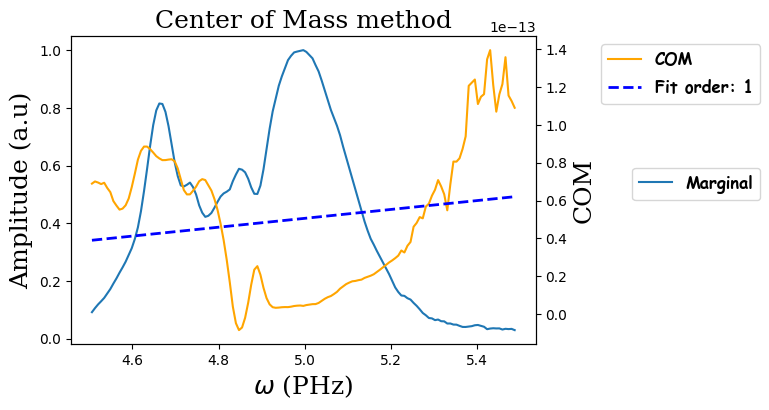

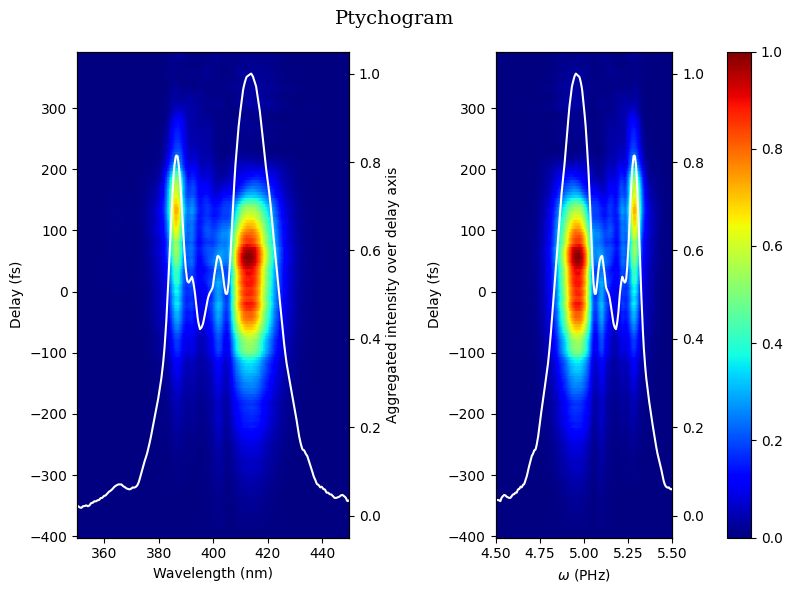

In [9]:
data, w, t, delay, guess_w, guess_t = Ptc.read_trace(path="ptycho_reflection_2.txt",\
                                                    draw=True, om_lim=(4.5, 5.5),\
                                                    wl_lim=(350, 450), N_int=1024, COM= (4.5, 5.5))

$\bullet $ Note That if we use the COM with the "$\texttt{read\_trace()}$"  function, the guess_t is a complex 1D array.

In [8]:
type(guess_t[0])

numpy.complex128

In [10]:
RMS = []
E_old = guess_t
for i in range(200):

    E_old, G_old = Ptc.single_ptycho(gate=G_old, test=E_old, w_axis=w*1e-15, t_axis=t*1e15, delay=delay,\
                                      Imn=data, update_g=True, gate_wonder=False, pulse_wonder= False)
    
    if i%20 == 0:
        Imn_new = abs( Ptc.pty_signal(w/1e15, E_old, G_old, delay)  )**2
        Imn_new /= np.max(Imn_new)
        RMS.append(Ptc.G_trebino(data, Imn_new))
        print("Test fwhm: {:.2f} fs".format(Ptc.fwhm_eval(t*1e15, abs(E_old)**2)),\
            "Gate fwhm: {:.2f} fs".format(Ptc.fwhm_eval(t*1e15, abs(G_old)**2)),\
            "RMS: {:.3e}".format(RMS[-1]))

Test fwhm: 10.51 fs Gate fwhm: 123.40 fs RMS: 4.048e-02
Test fwhm: 6.22 fs Gate fwhm: 99.79 fs RMS: 9.427e-03
Test fwhm: 6.44 fs Gate fwhm: 95.37 fs RMS: 7.759e-03
Test fwhm: 6.71 fs Gate fwhm: 95.14 fs RMS: 7.209e-03
Test fwhm: 6.98 fs Gate fwhm: 94.76 fs RMS: 6.995e-03
Test fwhm: 7.21 fs Gate fwhm: 95.01 fs RMS: 7.015e-03
Test fwhm: 7.39 fs Gate fwhm: 95.05 fs RMS: 7.108e-03
Test fwhm: 7.49 fs Gate fwhm: 96.00 fs RMS: 6.851e-03
Test fwhm: 7.42 fs Gate fwhm: 96.22 fs RMS: 7.088e-03
Test fwhm: 7.44 fs Gate fwhm: 96.75 fs RMS: 7.046e-03


### Plots

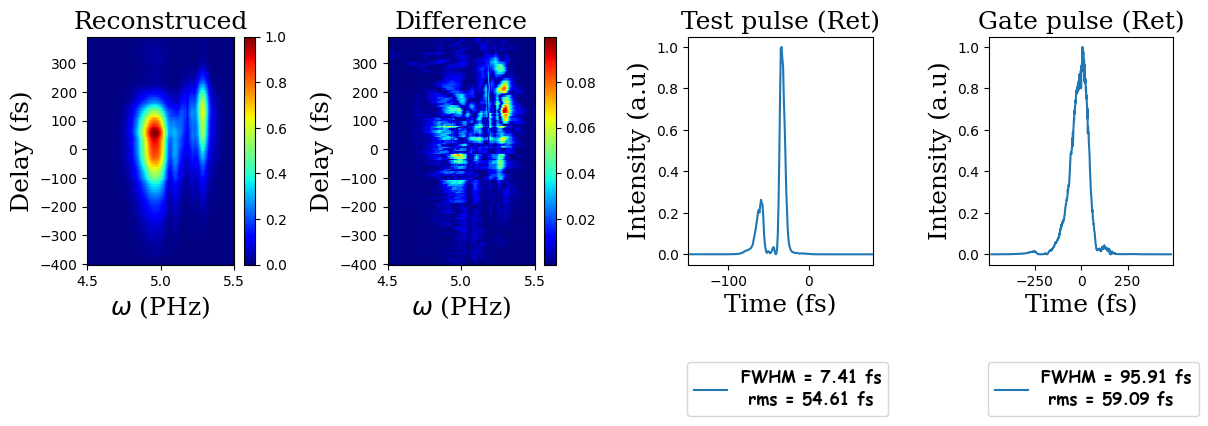

In [12]:
Ptc.plot_panel(E_old, G_old, t*1e15, w/1e15, delay, Imn_new, data, om_lim= (4.5, 5.5), E_t_lim= (-150, 80),\
 figsize=(12, 6)) 

### Spectral phase

The function "$\texttt{plot\_phase()}$" retrun the phase and also the coefficient of the polynomial fit if the limits are provided.

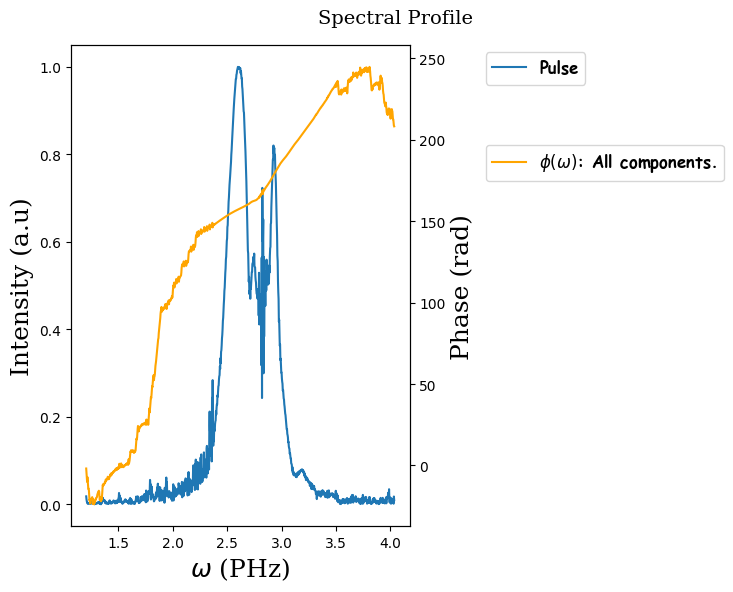

In [14]:
Ptc.plot_phase(w, E_old, Wl_g=800)